# Simulated Model of Interviewing Hiring and Rejection
*Lucas Pierce - June 2023*

This is a fast-and-loose simulation of interviewing at selective tech companies. The main takeaways are:

1. There is a tradeoff between maintaining a high hiring bar and rejecting candidates that would otherwise be a good fit due to uncertainty in the interview process.
2. The base rate of the channel you come in through has a massive impact on how many good candidates a company needs to reject to maintain said hiring bar. I.e., coming in through referrals or other pre-vetted channels means the company doesn't need to rely on the interview itself for as much of the signal.


## Assumption 1: Most applicants applying are not going to be a good fit
CalPoly accepts ~3% of students in Computer Science. Major tech companies having an applicant to hire rate of < 1%. Let's say, generously, that 10% of job applicants are "good hires".

## Assumption 2: The interview is an imperfect process of determining who is going to be a good hire
Interviews are imperfect diagnostic tools of who is going to perform well. Leetcode performance is only loosely correlated with actual job performance. The fact that people grind away at memorizing leetcode questions just loosens the correlation even more.

Let's simplify the interview process into a test that scores job candidates from 1 to 100. Pulling some numbers out of thin air, we will say good hires have a mean score of 60 and bad hires have a mean score of 45.

## Assumption 3: Bad hires are more painful than rejecting good hires
Generally, bad hires are very painful for a team. Teams rather reject some good candidates rather than make a the wrong hire. Bad in this case is situational, it doesn't mean the person is bad, just that the hire won't be a good fit for the team and the work they are doing.

Let's say companies will set the test score cutoff so that 90% of their hires turn out to be "good hires". This is generally a fair assumption based on the companies I've worked for.

Initial Imports

In [ ]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Generate initial simulation data.

In [ ]:
# Generate data for the distributions

percent_good_hires = 0.10  # 10% of applicants are good hires
total_applications = 1000000  # 10,000 people apply for the job

bad_hire_population = int(total_applications*(1-percent_good_hires))
good_hire_population = int(total_applications*percent_good_hires)

bad_hires_test_scores = np.random.normal(45, 10, bad_hire_population)  # Generating data points for the first distribution
bad_hires_test_scores = np.clip(bad_hires_test_scores, 0, 100)  # Cap values between 0 and 100

good_hires_test_scores = np.random.normal(60, 10, good_hire_population)  # Generating data points for the second distribution
good_hires_test_scores = np.clip(good_hires_test_scores, 0, 100)  # Cap values between 0 and 100



Distribution of Good and Bad Test Scores

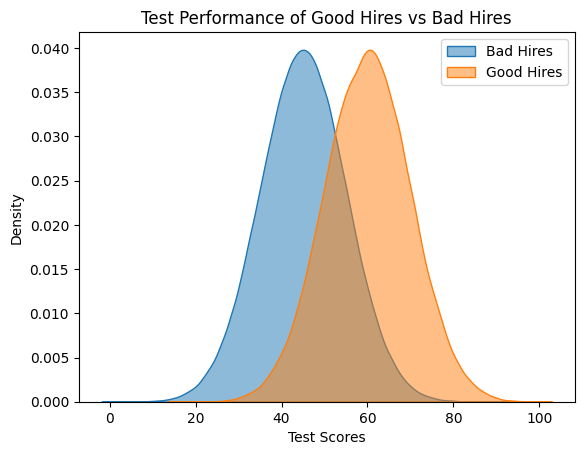

In [ ]:
# Create a figure and axis for the KDE plots
fig, ax = plt.subplots()

# Plot the KDE plots
sns.kdeplot(bad_hires_test_scores, fill=True, alpha=0.5, label='Bad Hires')
sns.kdeplot(good_hires_test_scores, fill=True, alpha=0.5, label='Good Hires')

# Set labels and title
ax.set_xlabel('Test Scores')
ax.set_ylabel('Density')
ax.set_title('Test Performance of Good Hires vs Bad Hires')

# Add a legend
ax.legend()

# Show the plot
plt.show()


Weighted distribution of test scores by population size

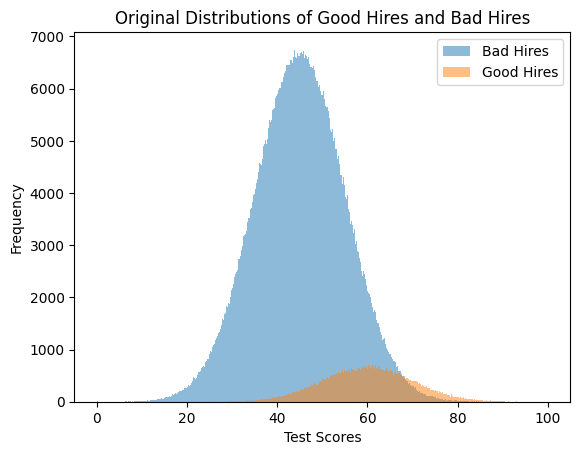

In [ ]:
# Create a figure and axis for the histograms
fig, ax = plt.subplots()

# Plot the histograms with density=True
ax.hist(bad_hires_test_scores, bins=500, alpha=0.5, label='Bad Hires')
ax.hist(good_hires_test_scores, bins=500, alpha=0.5, label='Good Hires')

# Set labels and title
ax.set_xlabel('Test Scores')
ax.set_ylabel('Frequency')
ax.set_title('Original Distributions of Good Hires and Bad Hires')



# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Calculate the probability of a good hire given a test scores between 10 and 90 at increments of 10
results = []

for test_score in range(10, 100, 5):
    false_positives = np.sum(bad_hires_test_scores >= test_score)
    true_positives = np.sum(good_hires_test_scores >= test_score)
    true_negatives = bad_hire_population - false_positives
    false_negatives = good_hire_population - true_positives
    
    sensitivity = (int(true_positives) / (true_positives + false_negatives))*100
    specificity = (int(true_negatives) / (true_negatives + false_positives))*100
    
    percent_of_hires_that_are_good_hires = (int(true_positives) / (true_positives + false_positives))*100
    percent_of_good_hires_rejected = 100 - sensitivity
    percent_of_all_hires_rejected = ((true_negatives + false_negatives)/total_applications)*100

    results.append([test_score, percent_of_good_hires_rejected, percent_of_hires_that_are_good_hires, percent_of_all_hires_rejected, sensitivity, specificity])

# Create a DataFrame from the results
table_headers = ["Test Score", "% of Good Hires Rejected", "% of Hires that are Good Hires", "Overall acceptance rate %", "Sensitivity", "Specificity"]
df = pd.DataFrame(results, columns=table_headers)

# Display the DataFrame as a table
df

,Test Score,% of Good Hires Rejected,% of Hires that are Good Hires,Overall acceptance rate %,Sensitivity,Specificity
0,10,0.000,10.002251,0.0225,100.000,0.025000
1,15,0.000,10.011674,0.1166,100.000,0.129556
2,20,0.002,10.055568,0.5546,99.998,0.616000
3,25,0.022,10.206544,2.0452,99.978,2.270000
4,30,0.121,10.628264,6.0251,99.879,6.681111
5,35,0.619,11.606838,14.3772,99.381,15.905889
6,40,2.303,13.567275,27.9907,97.697,30.844889
7,45,6.689,17.161527,45.6278,93.311,49.954333
8,50,15.957,23.191569,63.7614,84.043,69.073000
9,55,31.086,32.537914,78.8204,68.914,84.124222


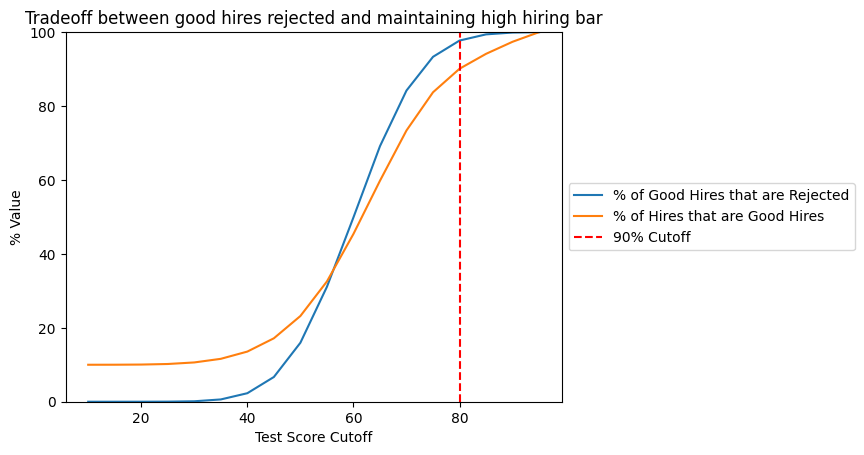

In [ ]:
# Extract data for plotting
test_scores = [result[0] for result in results]
percent_of_good_hires_rejected = [result[1] for result in results]
percent_good_hires = [result[2] for result in results]  # Scale percent to range from 0 to 100

# Find the test score cutoff where percent of hires that are good hires crosses 90%
cutoff_breaching_90 = [test_score for test_score, percent in zip(test_scores, percent_good_hires) if percent >= 90]

# Plot the tradeoff between test score cutoff, sensitivity, specificity, and percent of hires that are good hires
fig, ax = plt.subplots()
ax.plot(test_scores, percent_of_good_hires_rejected, label="% of Good Hires that are Rejected")
ax.plot(test_scores, percent_good_hires, label="% of Hires that are Good Hires")
ax.set_xlabel("Test Score Cutoff")
ax.set_ylabel("% Value")
ax.set_title("Tradeoff between good hires rejected and maintaining high hiring bar")
ax.set_ylim([0, 100])  # Set the y-axis limits to range from 0 to 100

# Add a vertical line at the test score cutoff where percent of hires that are good hires crosses 90%
if cutoff_breaching_90:
    cutoff = cutoff_breaching_90[0]
    ax.axvline(x=cutoff, color='red', linestyle='--', label="90% Cutoff")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()